In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## New material

### What is meant by the distribution of the sample average?

____

- Remember that we consider the United Airlines dataset to be the population of all United Airlines flights which departed from San Franisco in a two month period.
- We are using this dataset as a teaching tool to empirically verify the results we discuss in the text and slides.

In [2]:
united = Table.read_table('united.csv')

In [3]:
united.sample(6,with_replacement = False).show()

Date,Flight Number,Destination,Delay
7/5/15,1273,OGG,171
6/6/15,1449,LAS,-3
6/22/15,572,ORD,50
7/13/15,414,SAN,-5
8/14/15,394,LAS,2
6/3/15,728,ORD,-1


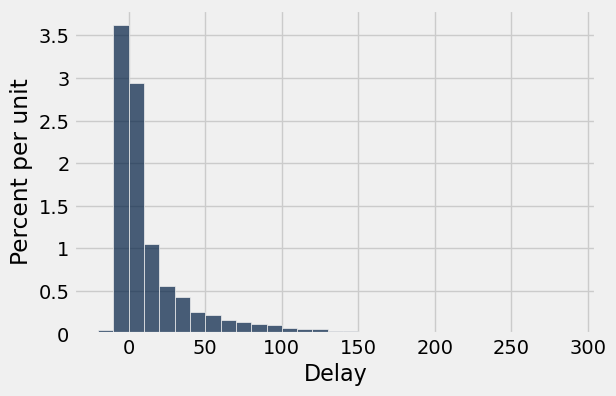

In [4]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [5]:
population_mean = np.average(united.column("Delay"))
population_mean

16.658155515370705

In [6]:
population_sd = np.std(united.column("Delay"))
population_sd

39.480199851609314

Functions from yesterday:

In [9]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [8]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample of size 400.
- Plot these on a histogram, and demarcate also the population mean.

In [10]:
sample_means_400 = ten_thousand_sample_means(400)
sample_averages_average=np.average(sample_means_400)
sample_averages_average

16.634166

Population Average: 16.6581555154


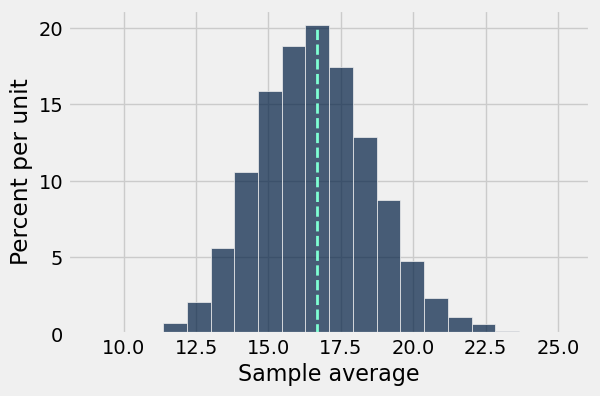

In [11]:
t=Table().with_column('Sample average', sample_means_400)
t.hist(bins=20)
plots.plot((population_mean, population_mean), (0, 0.2), color='aquamarine', lw=2,ls='--')
print('Population Average:', population_mean)

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample of size 900.
- Plot these on a histogram along with the ten thousand sample means of size 400
- Demarcate also the population mean.

In [13]:
sample_means_900 = ten_thousand_sample_means(900)

In [14]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

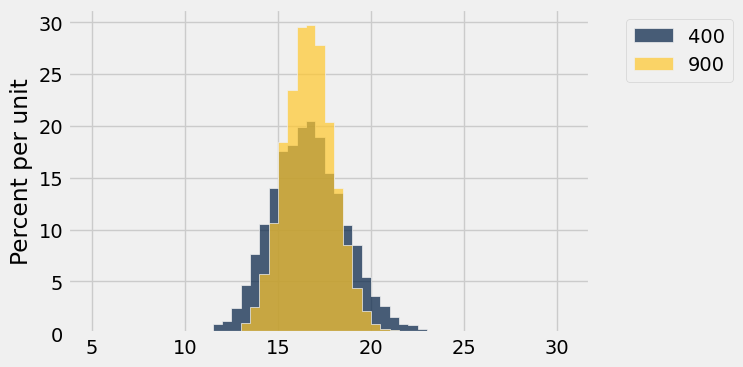

In [16]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))

### Can we quantify the 'relationship' between the width of the bell shape and sample size?

**Task**: 
- Obtain ten thousand sample means, each being acquired from a sample size that we choose.
- Plot these on a histogram.
- Calculate/reference a few quantites of interest:
    - population standard deviation
    - standard deviation of the sample means
- See if we can pick up on a pattern!

In [17]:
def plot_sample_means(sample_size):
    """Empirical distribution of random sample means"""
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Population SD / SD of sample means:",population_sd/ np.std(sample_means))
    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')

Population SD: 39.4801998516
SD of sample means: 3.99688495973
Population SD / SD of sample means: 9.87774235422


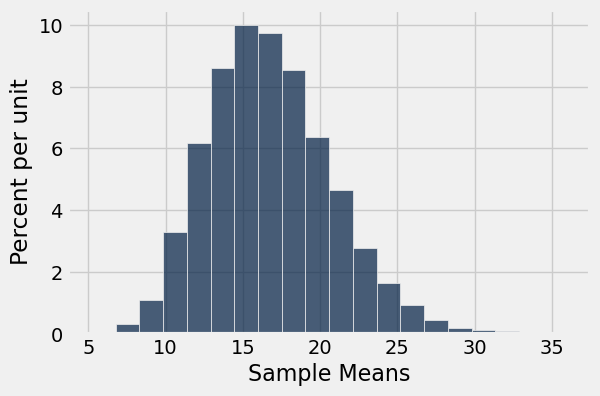

In [18]:
plot_sample_means(100)

Population SD: 39.4801998516
SD of sample means: 1.97776301722
Population SD / SD of sample means: 19.9620477822


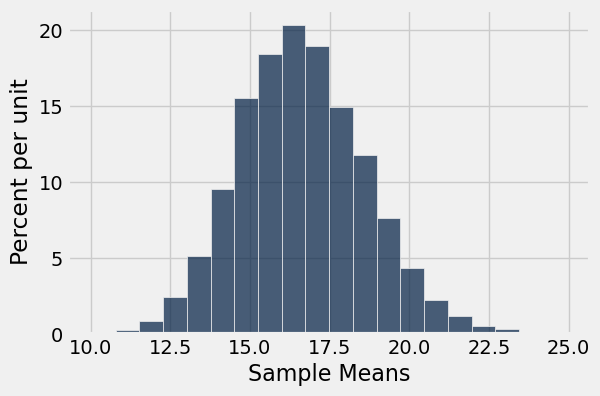

In [19]:
plot_sample_means(400)

Population SD: 39.4801998516
SD of sample means: 1.57175665247
Population SD / SD of sample means: 25.1185193264


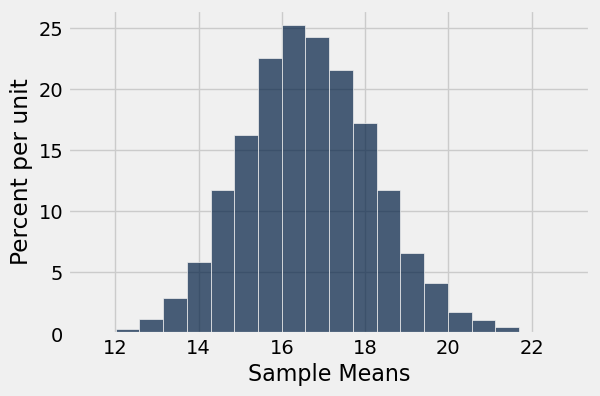

In [20]:
plot_sample_means(625)

#### The trend above we are seeing is...

$$\frac{\text{population SD}}{\text{SD of sample means}} = \sqrt{\text{sample size}}$$

#### Now, let's solve for the SD of the sample means...

$$\text{SD of sample means} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$$

_______

The cell below will take a while to run.

In [21]:
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [22]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.9438,3.94802
150,3.19154,3.22354
200,2.75728,2.79167
250,2.49203,2.49695
300,2.28321,2.27939
350,2.10118,2.11031
400,1.95039,1.97401
450,1.85867,1.86111
500,1.76992,1.76561
550,1.70259,1.68344


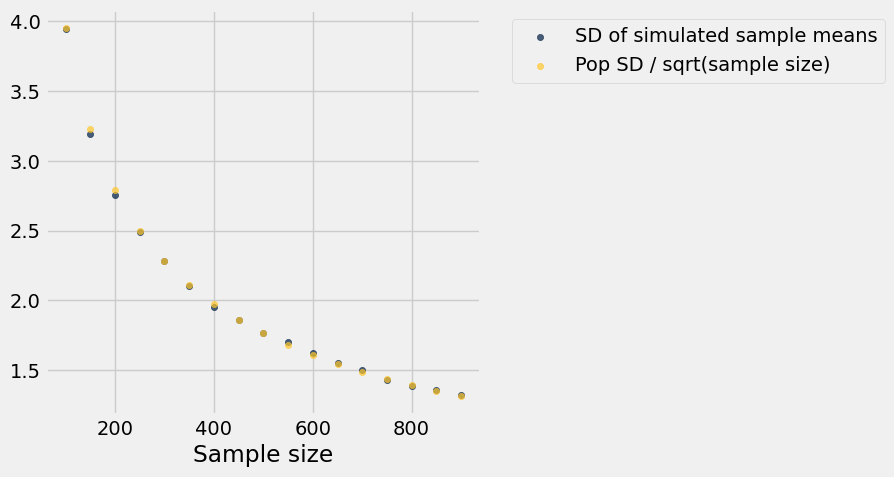

In [23]:
sd_table.scatter('Sample size')